In [0]:
import azure.ai.vision as sdk

endpoint = "https://computervisionlgpr.cognitiveservices.azure.com/"
key = "02d1b266c283499da549184a3c695d1a"


In [0]:

credencialesDeAcceso = sdk.VisionServiceOptions(endpoint, key)
#Instanciamos una configuracion
configuration = sdk.ImageAnalysisOptions()

In [0]:
# Definimos que queremos obtener de la imagen:
#
# CAPTION: Una descripcion general de la imagen
# OBJECTS: Los objetos de la imagen
# PEOPLE: Las personas en la imagen
# DENSE_CAPTIONS: Descripcion detallada de las escenas en la imagen
# TAGS: Etiquetas de la imagen
#
configuration.features = (
  sdk.ImageAnalysisFeature.CAPTION |
  sdk.ImageAnalysisFeature.OBJECTS |
  sdk.ImageAnalysisFeature.PEOPLE |
  sdk.ImageAnalysisFeature.DENSE_CAPTIONS |
  sdk.ImageAnalysisFeature.TAGS
)

In [0]:
configuration.language = "en"

In [0]:
%fs cp dbfs:///mnt/azure/data/IMAGEN_2.jpg file:///tmp

res1: Boolean = true

In [0]:
%fs ls file:///tmp/IMAGEN_2.jpg

path name size modificationTime file:/tmp/IMAGEN_2.jpg IMAGEN_2.jpg 310010 1712099588221

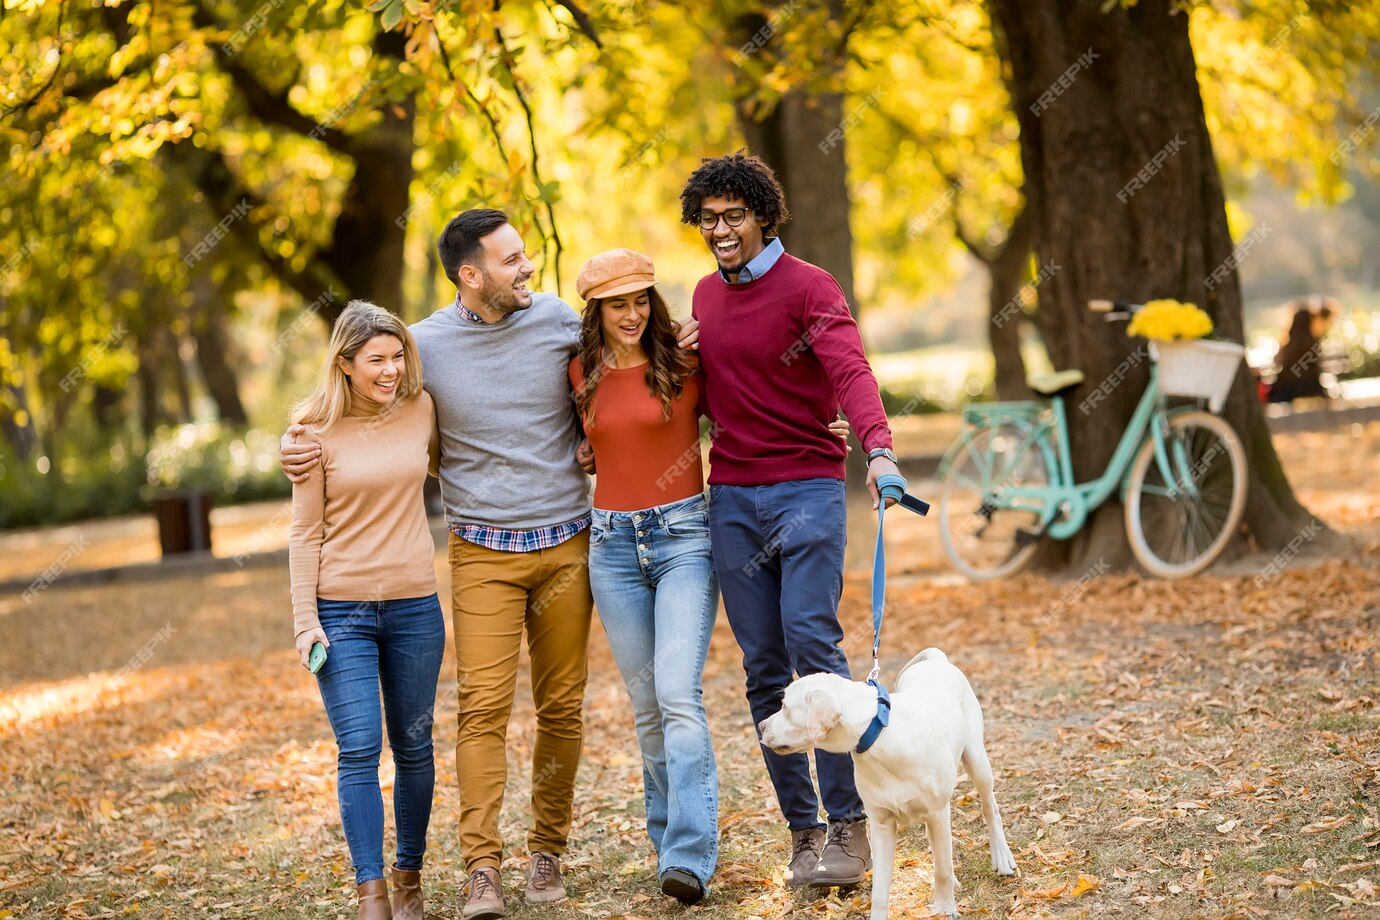

In [0]:
from PIL import Image
import IPython.display as visual
visual.display(Image.open("/tmp/IMAGEN_2.jpg"))

In [0]:
archivo = sdk.VisionSource(
  filename = "/tmp/IMAGEN_2.jpg"
)

In [0]:
servicio = sdk.ImageAnalyzer(credencialesDeAcceso, archivo, configuration)
resultado = servicio.analyze()

In [0]:
descripcion = resultado.caption.content

print(descripcion)

a group of people walking a dog


In [0]:
descripcion = ""

In [0]:
for objeto in resultado.objects:
  print(objeto)

DetectedObject(bounding_box=Rectangle(x=1123, y=408, w=133, h=162), name='Wheel', confidence=0.65)
DetectedObject(bounding_box=Rectangle(x=515, y=850, w=52, h=55), name='footwear', confidence=0.5)
DetectedObject(bounding_box=Rectangle(x=775, y=822, w=96, h=80), name='footwear', confidence=0.63)
DetectedObject(bounding_box=Rectangle(x=931, y=292, w=347, h=299), name='bicycle', confidence=0.767)
DetectedObject(bounding_box=Rectangle(x=382, y=196, w=231, h=708), name='person', confidence=0.715)
DetectedObject(bounding_box=Rectangle(x=550, y=222, w=204, h=695), name='person', confidence=0.733)
DetectedObject(bounding_box=Rectangle(x=672, y=139, w=241, h=757), name='person', confidence=0.826)
DetectedObject(bounding_box=Rectangle(x=274, y=287, w=188, h=630), name='person', confidence=0.86)
DetectedObject(bounding_box=Rectangle(x=307, y=589, w=133, h=308), name='Jeans', confidence=0.772)
DetectedObject(bounding_box=Rectangle(x=590, y=498, w=149, h=394), name='Jeans', confidence=0.575)
Detect

In [0]:
for objeto in resultado.objects:
  linea = objeto.name + "|" + str(objeto.confidence) + "|" + str(objeto.bounding_box.x) + "|" + str(objeto.bounding_box.y) + "|" + str(objeto.bounding_box.w) + "|" + str(objeto.bounding_box.h)
  #Concatenar
  descripcion = descripcion + linea + "\n"

In [0]:
descripcion = "Objeto|Probabilidad|x|y|w|h" + "\n" + descripcion

In [0]:
print(descripcion)

Objeto|Probabilidad|x|y|w|h
Wheel|0.65|1123|408|133|162
footwear|0.5|515|850|52|55
footwear|0.63|775|822|96|80
bicycle|0.767|931|292|347|299
person|0.715|382|196|231|708
person|0.733|550|222|204|695
person|0.826|672|139|241|757
person|0.86|274|287|188|630
Jeans|0.772|307|589|133|308
Jeans|0.575|590|498|149|394
dog|0.642|757|651|250|256



In [0]:
def extraerObjetos(resultado):
  descripcion = ""
  cabecera = "Objeto| Probabilidad|x|y|z|h"

  for objeto in resultado.objects:
    linea = objeto.name + "|" + str(objeto.confidence) + "|" + str(objeto.bounding_box.x) + "|" + str(objeto.bounding_box.y) + "|" + str(objeto.bounding_box.w) + "|" + str(objeto.bounding_box.h)
    #Concatenar
    descripcion = descripcion + linea + "\n"

  #Le agregamos una cabecera
  descripcion = cabecera + "\n" + descripcion
  return descripcion





In [0]:
objetos = extraerObjetos(resultado)

In [0]:
print(objetos)

Objeto| Probabilidad|x|y|z|h
Wheel|0.65|1123|408|133|162
footwear|0.5|515|850|52|55
footwear|0.63|775|822|96|80
bicycle|0.767|931|292|347|299
person|0.715|382|196|231|708
person|0.733|550|222|204|695
person|0.826|672|139|241|757
person|0.86|274|287|188|630
Jeans|0.772|307|589|133|308
Jeans|0.575|590|498|149|394
dog|0.642|757|651|250|256



In [0]:
with open("/tmp/resultado_objetos.txt","w") as archivoDeTexto:
  #Escribimos el contenido en el
  archivoDeTexto.write(objetos)

In [0]:
%fs cp file:///tmp/resultado_objetos.txt dbfs:///mnt/azure

res3: Boolean = true

In [0]:
%fs ls dbfs:///mnt/azure

path name size modificationTime dbfs:/mnt/azure/data/ data/ 0 0 dbfs:/mnt/azure/resultado_objetos.txt resultado_objetos.txt 339 1712100826000 dbfs:/mnt/azure/resultado_ocr.txt resultado_ocr.txt 4276 1712098065000